# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings


In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.3.5
pandas version: 2.3.3
matplotlib version: 3.10.7
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [57]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\piyus\Assignment\trip_records')

# Create a list of all the twelve files to read 
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month['date'] = df_month['tpep_pickup_datetime'].dt.date
        df_month['hour'] = df_month['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_month['date'].unique():
            for hour in range(24):
                hour_data = df_month[(df_month['date'] == date) & (df_month['hour'] == hour)]
                if not hour_data.empty:
                    sample = hour_data.sample(frac = 0.05, random_state = 42)
                    sampled_data = pd.concat([sampled_data, sample])

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 428 to 2596448
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

In [58]:
# Store the df in csv/parquet
df.to_parquet('sampled_data')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
df = pd.read_parquet('trip_records/sampled_data')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1996062 entries, 428 to 1890646
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [5]:
# Fix the index and drop any columns that are not needed
df.reset_index(inplace = True)
# dropping store_and_fwd_flag
df.drop(columns = 'store_and_fwd_flag', axis = 1, inplace = True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [6]:
# Combine the two airport fee columns
df["airport_fee"] = df["airport_fee"] + df["Airport_fee"]
df.drop(columns = ['Airport_fee','index'], axis = 1, inplace = True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [35]:
# check where values of fare amount are negative
df['fare_amount'].describe()

count    1.996062e+06
mean     1.991829e+01
std      1.029490e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

Did you notice something different in the `RatecodeID` column for above records?

In [36]:
# Analyse RatecodeID for the negative fare amounts

df['RatecodeID'].describe()

count    1.927730e+06
mean     1.633365e+00
std      7.384584e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

In [62]:
# Find which columns have negative values
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,month,trip_duration,trip_duration_minutes
count,1.896367e+06,1896367,1896367,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,...,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1896367,1.896367e+06
mean,1.748507e+00,2023-07-02 01:01:44.052133,2023-07-02 01:19:09.105886,1.391465e+00,3.456440e+00,1.640429e+00,1.654336e+02,1.643198e+02,1.204175e+00,1.978186e+01,...,4.953492e-01,3.582368e+00,5.997897e-01,9.993257e-01,2.892116e+01,2.307588e+00,1.429928e+01,6.514530e+00,0 days 00:17:25.053753,1.741756e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0 days 00:00:00,0.000000e+00
25%,1.000000e+00,2023-04-01 22:08:56.500000,2023-04-01 22:25:19,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,...,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01,4.000000e+00,0 days 00:07:36,7.600000e+00
50%,2.000000e+00,2023-06-26 13:23:09,2023-06-26 13:41:28,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,...,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,1.500000e+01,6.000000e+00,0 days 00:12:33,1.255000e+01
75%,2.000000e+00,2023-10-05 22:34:05.500000,2023-10-05 22:49:33,1.000000e+00,3.390000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,...,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.072000e+01,2.500000e+00,1.900000e+01,1.000000e+01,0 days 00:20:32,2.053333e+01
max,2.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,6.000000e+00,2.048600e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.375000e+03,...,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.435190e+03,2.500000e+00,2.300000e+01,1.200000e+01,4 days 08:26:23,6.266383e+03
std,4.338714e-01,NaN,NaN,8.818088e-01,4.557748e+00,7.430384e+00,6.366229e+01,6.975538e+01,4.654299e-01,1.829111e+01,...,4.825695e-02,4.072697e+00,2.191063e+00,2.409781e-02,2.292226e+01,6.663394e-01,5.783900e+00,3.463684e+00,0 days 00:42:03.931182,4.206552e+01


In [7]:
# fix these negative values
neg_cols = ['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge']
df[neg_cols] = df[neg_cols].abs()


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [8]:
# Find the proportion of missing values in each column
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 68332
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       68332
airport_fee              1996062
date                           0
hour                           0
dtype: int64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [9]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
passengers_count_mode = df['passenger_count'].mode()[0]
# filling mode as null values
df['passenger_count'] = df['passenger_count'].fillna(passengers_count_mode)

Did you find zeroes in passenger_count? Handle these.

In [10]:
# dropping rows with 0 passenger_count
df = df[df['passenger_count'] != 0]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [11]:
# Fix missing values in 'RatecodeID'
ratecode_id_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecode_id_mode)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [12]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    1750476
0.0     146015
0.5          1
Name: count, dtype: int64

In [13]:
# filling null values as 0 as using 2.5 as congfestion charge will influene data in the wrong way. 
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [14]:
# Handle any remaining missing values
# dropping airport_fee column as all values are null
df.drop(columns = 'airport_fee', axis = 1, inplace = True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [18]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour
count,1.961366e+06,1961366,1961366,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06,1.961366e+06
mean,1.744929e+00,2023-07-02 22:57:16.778747,2023-07-02 23:14:45.538480,1.378590e+00,3.860868e+00,1.619722e+00,1.652630e+02,1.640461e+02,1.164355e+00,1.995598e+01,1.563223e+00,4.953188e-01,3.556588e+00,6.003622e-01,9.990873e-01,2.903616e+01,2.231195e+00,1.426951e+01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 17:44:29.500000,2023-04-02 18:00:47.750000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01
50%,2.000000e+00,2023-06-27 18:46:03.500000,2023-06-27 19:00:53.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,1.500000e+01
75%,2.000000e+00,2023-10-06 22:54:32.250000,2023-10-06 23:09:29,1.000000e+00,3.410000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.206000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.100000e+01,2.500000e+00,1.900000e+01
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,2.300000e+01
std,4.410640e-01,NaN,NaN,8.701990e-01,1.274376e+02,7.309794e+00,6.397923e+01,6.981446e+01,5.058259e-01,1.038330e+02,1.820746e+00,4.840291e-02,4.058958e+00,2.194762e+00,2.778610e-02,1.047313e+02,7.744389e-01,5.813338e+00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
- *Entries where `tpep_dropoff_datetime` is before `tpep_pickup_datetime`. (Added by me)*

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [16]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [17]:
# Continue with outlier handling
# outlier_1 where entries where trip_distance is nearly 0 and fare_amount is more than 300
outlier_1 = df[(df['trip_distance'] < 1) & (df['fare_amount'] > 300)]
# removing outlier_1
df = df[~((df['trip_distance'] < 1) & (df['fare_amount'] > 300))]

In [18]:
# outlier_2 where Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones
# are different (both distance and fare should not be zero for different zones)
outlier_2 = df[(df['trip_distance']== 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])]
# outlier_2 has 0 rows

In [19]:
# outlier_3 where entries where trip_distance is more than 250 miles and 
# entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
outlier_3 = df[(df['trip_distance'] > 250) | (df['payment_type'] == 0)]
# removing outlier_3
df = df[~((df['trip_distance'] > 250) | (df['payment_type'] == 0))]

In [20]:
# outlier_4 where entries where tpep_dropoff_datetime is before tpep_pickup_datetime. (Added by me)
outlier_4 = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
# removing outlier_4
df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896367 entries, 0 to 1996061
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [138]:
# Do any columns need standardising?
# No, there isn't any need for standardising


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [22]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`



It is Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [22]:
# Find and show the hourly trends in taxi pickups
hourly_trend = df.groupby('hour').agg({
    'passenger_count': 'sum',
    'trip_distance': 'sum'
})
hourly_trend

,passenger_count,trip_distance
hour,,
0,76334.0,208693.41
1,51145.0,123012.98
2,34089.0,74893.20
3,22335.0,52859.99
4,13859.0,47153.09
5,13546.0,62352.09
6,31925.0,123563.24
7,64772.0,185432.25
8,91567.0,226814.50


In [23]:
# Find and show the daily trends in taxi pickups (days of the week)
daily_trend = df.groupby('date').agg({
    'passenger_count': 'sum',
    'trip_distance': 'sum'
})
daily_trend

,passenger_count,trip_distance
date,,
2022-12-31,1.0,0.86
2023-01-01,5922.0,15350.44
2023-01-02,5068.0,14952.10
2023-01-03,6050.0,16567.98
2023-01-04,6458.0,16558.87
...,...,...
2023-12-27,6303.0,15249.50
2023-12-28,6523.0,16132.05
2023-12-29,6440.0,15907.79


In [24]:
# Show the monthly trends in pickups
df['month'] = df['tpep_pickup_datetime'].dt.month
monthly_trends = df.groupby('month').agg({
    'passenger_count': 'sum',
    'trip_distance': 'sum'
})
monthly_trends

,passenger_count,trip_distance
month,,
1,212844.0,518546.59
2,200512.0,480131.86
3,233366.0,577577.69
4,230019.0,574147.76
5,240763.0,613716.71
6,228724.0,582267.80
7,205986.0,518812.75
8,196670.0,508208.01
9,191242.0,487411.30


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [28]:
# Analyse the above parameters
df.describe()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,month
count,1.896367e+06,1896367,1896367,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06,1.896367e+06
mean,1.748507e+00,2023-07-02 01:01:44.052133,2023-07-02 01:19:09.105886,1.391465e+00,3.456440e+00,1.640429e+00,1.654336e+02,1.643198e+02,1.204175e+00,1.978186e+01,1.610892e+00,4.953492e-01,3.582368e+00,5.997897e-01,9.993257e-01,2.892116e+01,2.307588e+00,1.429928e+01,6.514530e+00
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,2023-04-01 22:08:56.500000,2023-04-01 22:25:19,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,1.100000e+01,4.000000e+00
50%,2.000000e+00,2023-06-26 13:23:09,2023-06-26 13:41:28,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.860000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,1.500000e+01,6.000000e+00
75%,2.000000e+00,2023-10-05 22:34:05.500000,2023-10-05 22:49:33,1.000000e+00,3.390000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.450000e+00,0.000000e+00,1.000000e+00,3.072000e+01,2.500000e+00,1.900000e+01,1.000000e+01
max,2.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,6.000000e+00,2.048600e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.375000e+03,1.425000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.435190e+03,2.500000e+00,2.300000e+01,1.200000e+01
std,4.338714e-01,NaN,NaN,8.818088e-01,4.557748e+00,7.430384e+00,6.366229e+01,6.975538e+01,4.654299e-01,1.829111e+01,1.827884e+00,4.825695e-02,4.072697e+00,2.191063e+00,2.409781e-02,2.292226e+01,6.663394e-01,5.783900e+00,3.463684e+00


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
Yes, I believe trip distances with 0 should be dropped.

In [25]:
# Creating trip_duration column
# Creating column for trip_duration and trip_duration_minutes
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

In [26]:
# Create a df with non zero entries for the selected parameters.
 # Naming the df with non-zero entries as 'df_1'
df_1 = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0)]

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [27]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_1.groupby('month')['total_amount'].sum()
monthly_revenue

month
1     3336310.50
2     3174757.92
3     3816115.22
4     3706347.71
5     4069279.30
6     3816151.51
7     3241800.59
8     3132597.29
9     3308950.92
10    4130116.71
11    3876682.10
12    3775431.05
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [28]:
# Calculate proportion of each quarter
quaterly_revenue = monthly_revenue.groupby((monthly_revenue.index - 1)//3 +1).sum()
quaterly_revenue

month
1    10327183.64
2    11591778.52
3     9683348.80
4    11782229.86
Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

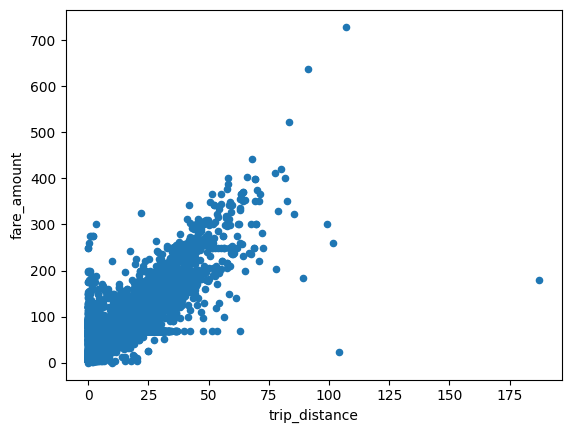

In [28]:
# Show how trip fare is affected by distance
df_1.plot.scatter(x = 'trip_distance', y = 'fare_amount')


In [32]:
corr_1 = df_1['trip_distance'].corr(df_1['fare_amount'])
print(corr_1)

0.9501481629436244


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

0.32473930361248554


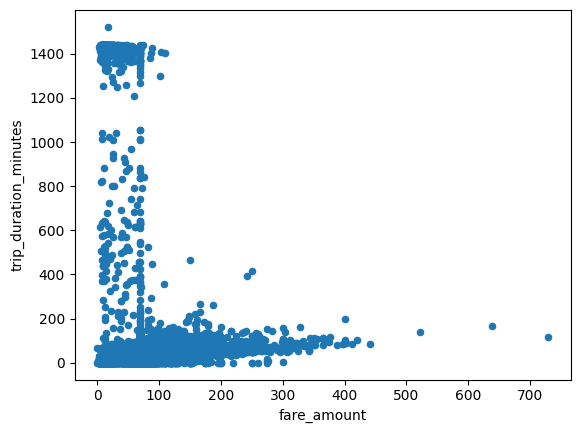

In [32]:
# Show relationship between fare and trip duration
df_1.plot.scatter(x = 'fare_amount', y = 'trip_duration_minutes')
corr_2 = df_1['fare_amount'].corr(df_1['trip_duration_minutes'])
print(corr_2)

0.03816933370140524


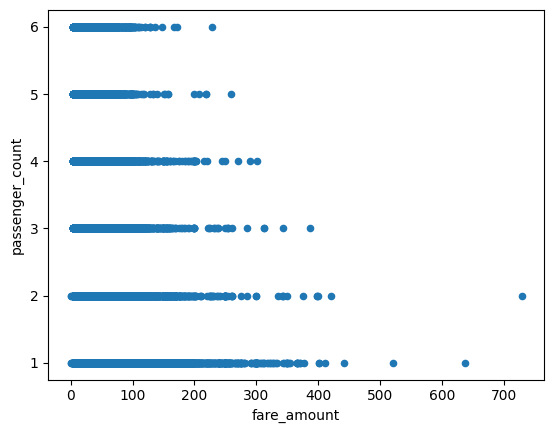

In [36]:
# Show relationship between fare and number of passengers
df_1.plot.scatter(x = 'fare_amount', y = 'passenger_count')
corr_3 = df_1['fare_amount'].corr(df_1['passenger_count'])
print(corr_3)

0.8002119229705879


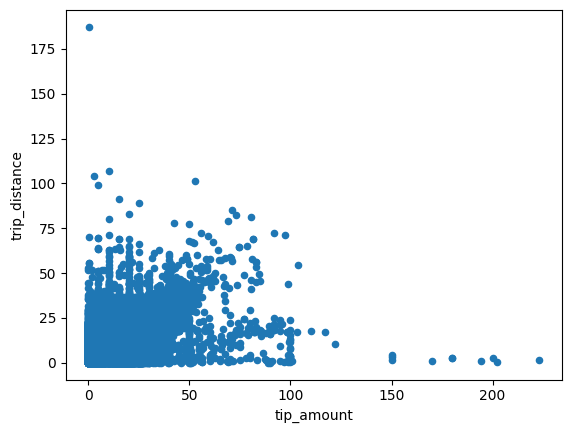

In [37]:
# Show relationship between tip and trip distance
df_1.plot.scatter(x = 'tip_amount', y = 'trip_distance')
corr_4 = df_1['tip_amount'].corr(df_1['trip_distance'])
print(corr_4)


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [29]:
# Analyse the distribution of different payment types (payment_type).
df_1.groupby('payment_type')['passenger_count'].count()

payment_type
1    1464128
2         21
3          9
4         16
Name: passenger_count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [63]:
!pip install geopandas

   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 5.5 MB/s eta 0:00:05
   --- ------------------------------------ 1.8/22.9 MB 4.1 MB/s eta 0:00:06
   ---- ----------------------------------- 2.6/22.9 MB 4.0 MB/s eta 0:00:06
   ----- ---------------------------------- 3.4/22.9 MB 4.0 MB/s eta 0:00:05
   ------- -------------------------------- 4.2/22.9 MB 4.0 MB/s eta 0:00:05
   -------- ------------------------------- 5.0/22.9 MB 3.9 MB/s eta 0:00:05
   ---------- ----------------------------- 6.0/22.9 MB 3.9 MB/s eta 0:00:05
   ----------- ---------------------------- 6.8/22.9 MB 3.9 MB/s eta 0:00:05
   ------------- -------------------------- 7.6/22.9 MB 3.9 MB/s eta 0:00:04
   -------------- ------------------------- 8.4/22.9 MB 3.9 MB/s eta 0:00:04
   ---------------- ----------------------- 9.2/22.9 MB 3.9 MB/s eta 0:00:04
   ----------------- ---------------------- 10.0/22.9 MB 3.9 MB/s eta 0:00:04
   --


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [30]:
# import geopandas as gpd

import geopandas as gpd
# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

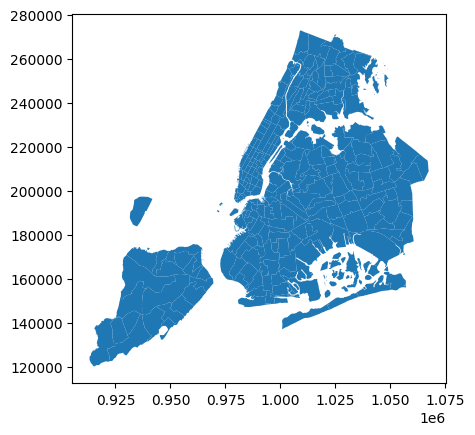

In [31]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [32]:
# Merge zones and trip records using locationID and PULocationID
# Naming the merge df as ' merge_df'
# We will be using this for analysis from now onwards
merged_df = pd.merge(df , zones, how = 'inner', left_on = 'PULocationID', right_on = 'LocationID')
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,month,trip_duration,trip_duration_minutes,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,138,256,2,32.4,...,1,0 days 00:15:57,15.950000,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,161,237,1,7.9,...,1,0 days 00:05:05,5.083333,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,237,141,2,11.4,...,1,0 days 00:10:33,10.550000,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,143,142,2,6.5,...,1,0 days 00:05:25,5.416667,143,0.054180,0.000151,Lincoln Square West,143,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,246,37,1,34.5,...,1,0 days 00:33:37,33.616667,246,0.069467,0.000281,West Chelsea/Hudson Yards,246,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [33]:
# Group data by location and calculate the number of trips
grouped_data = merged_df.groupby('LocationID').agg(trip_count = ("PULocationID","count")).reset_index()
grouped_data

,LocationID,trip_count
0,1,219
1,2,2
2,3,43
3,4,1915
4,5,14
...,...,...
249,259,50
250,260,368
251,261,9958
252,262,24469


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [34]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(grouped_data, how='inner', on='LocationID')
zones


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",219
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",43
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1915
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",14
...,...,...,...,...,...,...,...,...
250,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",50
251,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",368
252,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",9958
253,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",24469


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

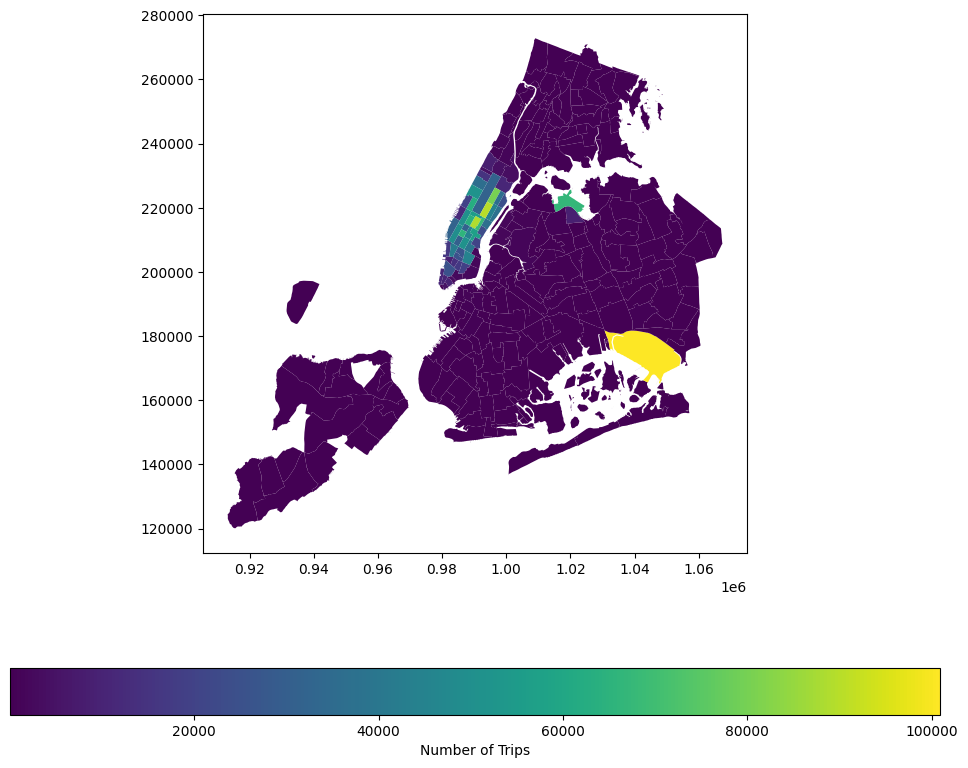

In [35]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count', 
                     ax = ax,
legend = True,
legend_kwds = {'label': "Number of Trips", 'orientation': "horizontal"})
plt.show()

In [36]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values('trip_count')


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
26,27,0.202509,0.001341,Breezy Point/Fort Tilden/Riis Beach,27,Queens,"POLYGON ((1021692.969 147138.664, 1021883.624 ...",1
104,111,0.059931,0.000209,Green-Wood Cemetery,111,Brooklyn,"POLYGON ((985590.381 179611.82, 986202.162 179...",1
108,115,0.116169,0.000373,Grymes Hill/Clifton,115,Staten Island,"POLYGON ((961850.466 167915.309, 961831.926 16...",1
82,84,0.233624,0.002074,Eltingville/Annadale/Prince's Bay,84,Staten Island,"POLYGON ((939754.454 131548.91, 939802.804 131...",1
103,109,0.178268,0.001170,Great Kills,109,Staten Island,"POLYGON ((943392.585 147162.426, 943412.636 14...",1
...,...,...,...,...,...,...,...,...
155,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",68060
228,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",80095
154,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",88916
229,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",89903


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [37]:
# Find routes which have the slowest speeds at different times of the day
merged_df['routes'] = merged_df['PULocationID'].astype(str) + ',' + merged_df['DOLocationID'].astype(str)

route_stats = merged_df.groupby(['hour','routes']).agg(
    avg_distance=('trip_distance','mean'),
    avg_duration=('trip_duration_minutes','mean')
).reset_index()

route_stats['speed'] = route_stats['avg_distance'] / (route_stats['avg_duration'] / 60)
route_stats

,hour,routes,avg_distance,avg_duration,speed
0,0,"10,232",16.120000,30.183333,32.044174
1,0,"10,243",18.550000,41.450000,26.851628
2,0,"10,255",13.460000,19.000000,42.505263
3,0,"10,261",19.100000,27.633333,41.471653
4,0,"10,76",4.780000,11.750000,24.408511
...,...,...,...,...,...
127735,23,"97,7",7.680000,21.850000,21.089245
127736,23,"97,79",2.740000,11.183333,14.700447
127737,23,"97,80",3.330000,9.616667,20.776430
127738,23,"97,89",2.490000,10.400000,14.365385


How does identifying high-traffic, high-demand routes help us?
- By identifying high traffic or high demand routes, we can divert taxis to different routes to minimize traffic congestion and increase the no. of taxis in the particular area to meet the required demand.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [38]:
# Visualise the number of trips per hour and find the busiest hour
count_of_trips_byhour = merged_df.groupby('hour')['hour'].count()
busiest_hour = count_of_trips_byhour.idxmax()
print(busiest_hour, " is the busiest hour of the day")

18 P.M. is the busiest hour of the day


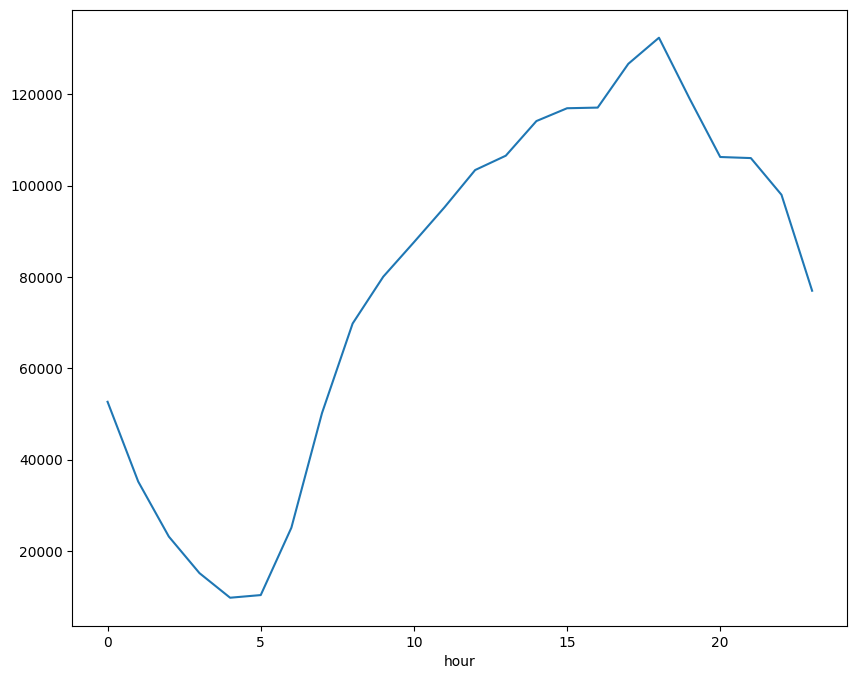

In [38]:
fig, ax = plt.subplots(1 ,1, figsize = (10, 8))
count_of_trips_byhour.plot(ax = ax)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [39]:
# Scale up the number of trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
scaled_up_trip_count_byhour = count_of_trips_byhour/sample_fraction
scaled_up_trip_count_byhour

hour
0     1052820.0
1      703480.0
2      462420.0
3      302400.0
4      194660.0
5      206240.0
6      501200.0
7     1003360.0
8     1395620.0
9     1600740.0
10    1751540.0
11    1904880.0
12    2067920.0
13    2130680.0
14    2282400.0
15    2338520.0
16    2341380.0
17    2533160.0
18    2647400.0
19    2380660.0
20    2124960.0
21    2120220.0
22    1959480.0
23    1539240.0
Name: hour, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [40]:
# Compare traffic trends for the week days and weekends
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek


In [41]:
merged_df['day_type'] = merged_df['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

In [42]:
trip_count_by_day_type_and_hour = merged_df.groupby(['day_type','hour'])['hour'].count()
scaled_up_trip_count_by_day_type_and_hour = trip_count_by_day_type_and_hour/sample_fraction
scaled_up_trip_count_by_day_type_and_hour

day_type  hour
Weekday   0        527460.0
          1        268240.0
          2        144620.0
          3         90460.0
          4         82860.0
          5        157520.0
          6        420340.0
          7        875540.0
          8       1194060.0
          9       1280360.0
          10      1321240.0
          11      1398040.0
          12      1495300.0
          13      1534300.0
          14      1675540.0
          15      1722960.0
          16      1713660.0
          17      1897180.0
          18      2014760.0
          19      1789820.0
          20      1610100.0
          21      1615860.0
          22      1464340.0
          23      1095720.0
Weekend   0        525360.0
          1        435240.0
          2        317800.0
          3        211940.0
          4        111800.0
          5         48720.0
          6         80860.0
          7        127820.0
          8        201560.0
          9        320380.0
          10       430300.0
     

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [40]:
# Find top 10 pickup and dropoff zones
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877269 entries, 0 to 1877268
Data columns (total 30 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[us] 
 2   tpep_dropoff_datetime  datetime64[us] 
 3   passenger_count        float64        
 4   trip_distance          float64        
 5   RatecodeID             float64        
 6   PULocationID           int64          
 7   DOLocationID           int64          
 8   payment_type           int64          
 9   fare_amount            float64        
 10  extra                  float64        
 11  mta_tax                float64        
 12  tip_amount             float64        
 13  tolls_amount           float64        
 14  improvement_surcharge  float64        
 15  total_amount           float64        
 16  congestion_surcharge   float64        
 17  date                   object         
 18  ho

In [61]:
top_ten_pickups = merged_df.groupby('PULocationID')['PULocationID'].count().sort_values(ascending = False).head(10)
top_ten_drops = merged_df.groupby('DOLocationID')['DOLocationID'].count().sort_values(ascending = False).head(10)
print('These are top 10 pickups locations:\n', top_ten_pickups)
print('These are top 10 drop locations:\n', top_ten_drops)

These are top 10 pickups locations:
 PULocationID
132    100900
237     89903
161     88916
236     80095
162     68060
138     66835
186     65559
230     63580
142     62975
170     56460
Name: PULocationID, dtype: int64
These are top 10 drop locations:
 DOLocationID
236    83974
237    80064
161    73992
230    58328
170    56192
162    53869
142    53167
239    52903
141    50108
68     47908
Name: DOLocationID, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [43]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df.groupby('PULocationID').size()
dropoff_counts = merged_df.groupby('DOLocationID').size()

# Combine into one DF
counts_df = pd.DataFrame({
    'pickups': pickup_counts,
    'dropoffs': dropoff_counts
}).fillna(0)
# Compute ratio
counts_df['pickup_drop_ratio'] = counts_df['pickups'] / counts_df['dropoffs'].replace(0, np.nan)

# Top 10 highest ratios
top10_ratios = counts_df.sort_values('pickup_drop_ratio', ascending=False).head(10)

# Bottom 10 lowest ratios
bottom10_ratios = counts_df.sort_values('pickup_drop_ratio').head(10)

print("Top 10 pickup/drop ratios:\n", top10_ratios)
print("Bottom 10 pickup/drop ratios:\n", bottom10_ratios)


Top 10 pickup/drop ratios:
       pickups  dropoffs  pickup_drop_ratio
70     8694.0    1027.0           8.465433
132  100900.0   21734.0           4.642496
138   66835.0   22975.0           2.909032
186   65559.0   41495.0           1.579925
114   25060.0   18100.0           1.384530
43    31692.0   23090.0           1.372542
249   41926.0   31558.0           1.328538
162   68060.0   53869.0           1.263435
100   31365.0   26049.0           1.204077
161   88916.0   73992.0           1.201697
Bottom 10 pickup/drop ratios:
      pickups  dropoffs  pickup_drop_ratio
265      0.0    7202.0           0.000000
30       0.0      18.0           0.000000
245      0.0      31.0           0.000000
57       0.0      32.0           0.000000
99       0.0       3.0           0.000000
176      0.0      13.0           0.000000
264      0.0    4915.0           0.000000
27       1.0      37.0           0.027027
221      1.0      32.0           0.031250
257     29.0     784.0           0.036990


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [46]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours_df = merged_df[(merged_df['hour'] >= 23) | (merged_df['hour'] < 5)]
top_ten_pickups_night_hours = night_hours_df.groupby('PULocationID')['PULocationID'].count().sort_values(ascending = False).head(10)
top_ten_drops_night_hours = night_hours_df.groupby('DOLocationID')['DOLocationID'].count().sort_values(ascending = False).head(10)
print('These are top 10 pickups locations:\n', top_ten_pickups_night_hours)
print('These are top 10 drop locations:\n', top_ten_drops_night_hours)

These are top 10 pickups locations:
 PULocationID
79     15908
132    13920
249    12851
48     10186
148     9927
114     9094
230     8111
186     6458
164     6192
138     6185
Name: PULocationID, dtype: int64
These are top 10 drop locations:
 DOLocationID
79     8555
48     6884
170    6323
107    5837
68     5732
141    5341
249    5073
263    5046
148    4509
230    4483
Name: DOLocationID, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [47]:
# Filter for night hours (11 PM to 5 AM)
night_hours_revenue = night_hours_df.groupby('hour')['fare_amount'].sum()
day_hours_df = merged_df[(merged_df['hour'] >= 5 ) & (merged_df['hour'] < 23)]
day_hours_revenue = day_hours_df.groupby('hour')['fare_amount'].sum()
print('The revenue share for night hours', night_hours_revenue)
print('The revenue share for day hours', day_hours_revenue)

The revenue share for night hours hour
0     1063024.21
1      640195.09
2      395371.00
3      273245.72
4      229471.71
23    1624189.63
Name: fare_amount, dtype: float64
The revenue share for day hours hour
5      285614.35
6      581999.03
7      969107.32
8     1294100.55
9     1504819.78
10    1654778.22
11    1821138.08
12    2023115.11
13    2162889.28
14    2422028.04
15    2483014.28
16    2486246.75
17    2500150.28
18    2429629.19
19    2191183.89
20    2017867.74
21    2030571.85
22    1947739.49
Name: fare_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [52]:
# Analyse the fare per mile per passenger for different passenger counts

# Fare per mile (handle zero distance)
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance'].replace(0, np.nan)

# Fare per mile per passenger
merged_df['fare_per_mile_per_passenger'] = merged_df['fare_per_mile'] / merged_df['passenger_count'].replace(0, np.nan)

# Average fare per mile per passenger for each passenger_count
avg_fare_per_passenger = (merged_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().sort_index())

print("Average fare per mile per passenger for each passenger count:\n")
print(avg_fare_per_passenger)

Average fare per mile per passenger for each passenger count:

passenger_count
1.0    10.832805
2.0     6.396138
3.0     3.937788
4.0     4.076627
5.0     1.705277
6.0     1.351955
Name: fare_per_mile_per_passenger, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [53]:
# Compare the average fare per mile for different days and for different times of the day

# Make sure fare_per_mile exists
if 'fare_per_mile' not in merged_df.columns:
    merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance'].replace(0, np.nan)

# Make sure day_of_week exists (0 = Monday)
if 'day_of_week' not in merged_df.columns:
    merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek

# Average fare per mile by hour
avg_fare_per_mile_by_hour = merged_df.groupby('hour')['fare_per_mile'].mean()

# Average fare per mile by day of week
avg_fare_per_mile_by_dow = merged_df.groupby('day_of_week')['fare_per_mile'].mean()

print("Average fare per mile by hour of the day:\n")
print(avg_fare_per_mile_by_hour)

print("\nAverage fare per mile by day of the week (0 = Monday):\n")
print(avg_fare_per_mile_by_dow)


Average fare per mile by hour of the day:

hour
0     10.420120
1     10.221329
2      9.512322
3     11.129866
4     14.368869
5     14.777477
6     10.712890
7     10.173196
8     10.423549
9     10.392013
10    10.361623
11    10.947553
12    11.960447
13    12.154215
14    11.714456
15    12.759197
16    13.778676
17    11.977069
18    11.637340
19    11.444411
20     9.568781
21     9.438713
22     9.956694
23    10.771243
Name: fare_per_mile, dtype: float64

Average fare per mile by day of the week (0 = Monday):

day_of_week
0    11.001286
1    11.310219
2    11.074340
3    11.281948
4    10.857655
5    10.783042
6    12.476611
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [54]:
# Compare fare per mile for different vendors 

# Ensure fare_per_mile is available
if 'fare_per_mile' not in merged_df.columns:
    merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance'].replace(0, np.nan)

# Vendor column can be 'VendorID' or 'vendorid' depending on how it came from the source
vendor_col = 'VendorID' if 'VendorID' in merged_df.columns else 'vendorid'

avg_fare_vendor_hour = (merged_df.groupby([vendor_col, 'hour'])['fare_per_mile'].mean().reset_index().pivot(index='hour', columns=vendor_col, values='fare_per_mile'))

print("Average fare per mile by vendor and hour of day:\n")
print(avg_fare_vendor_hour)



Average fare per mile by vendor and hour of day:

VendorID         1          2
hour                         
0         6.664628  11.470116
1         7.014580  11.119626
2         6.887545  10.273102
3         6.492426  12.434234
4         7.665207  16.552402
5         7.194177  17.826071
6         6.616743  12.413940
7         7.188867  11.337851
8         8.077279  11.301911
9         8.384582  11.140062
10        8.398381  11.087955
11        8.707197  11.762039
12        8.812322  13.091156
13        8.716576  13.398369
14        8.604183  12.822713
15        8.800240  14.148087
16        8.814961  15.514461
17        8.616176  13.110446
18        8.424752  12.686949
19        7.900330  12.566307
20        7.455520  10.216046
21        7.290052  10.065436
22        6.978819  10.801817
23        6.903011  11.885875


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [55]:
# Defining distance tiers
bins = [0, 2, 5, np.inf]
labels = ['0-2 miles', '2-5 miles', '>5 miles']

merged_df['distance_tier'] = pd.cut(merged_df['trip_distance'], bins=bins, labels=labels, right=True)

# Ensure fare_per_mile exists
if 'fare_per_mile' not in merged_df.columns:
    merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance'].replace(0, np.nan)

vendor_col = 'VendorID' if 'VendorID' in merged_df.columns else 'vendorid'

avg_fare_by_tier_vendor = (merged_df.groupby([vendor_col, 'distance_tier'])['fare_per_mile'].mean().reset_index().sort_values(['distance_tier', vendor_col]))

print("Average fare per mile by vendor and distance tier:\n")
print(avg_fare_by_tier_vendor)



Average fare per mile by vendor and distance tier:

   VendorID distance_tier  fare_per_mile
0         1     0-2 miles       9.904148
3         2     0-2 miles      17.703589
1         1     2-5 miles       6.372628
4         2     2-5 miles       6.546512
2         1      >5 miles       4.416658
5         2      >5 miles       4.502702


C:\Users\piyus\AppData\Local\Temp\ipykernel_4172\3585172450.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([vendor_col, 'distance_tier'])['fare_per_mile']


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [56]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Remove trips with non-positive total_amount to avoid weird ratios
valid_tips_df = merged_df[merged_df['total_amount'] > 0].copy()

# Tip percentage as % of total amount
valid_tips_df['tip_percent'] = (valid_tips_df['tip_amount'] / valid_tips_df['total_amount']) * 100

# Distance buckets
distance_bins = [0, 2, 5, 10, np.inf]
distance_labels = ['0-2', '2-5', '5-10', '>10']
valid_tips_df['distance_bucket'] = pd.cut(valid_tips_df['trip_distance'], bins=distance_bins, labels=distance_labels, right=True)

# Average tip % by distance bucket
avg_tip_by_distance = valid_tips_df.groupby('distance_bucket')['tip_percent'].mean()

# Average tip % by passenger_count
avg_tip_by_passengers = valid_tips_df.groupby('passenger_count')['tip_percent'].mean()

# Average tip % by pickup hour
avg_tip_by_hour = valid_tips_df.groupby('hour')['tip_percent'].mean()

print("Average tip % by distance bucket:\n", avg_tip_by_distance)
print("\nAverage tip % by passenger count:\n", avg_tip_by_passengers)
print("\nAverage tip % by pickup hour:\n", avg_tip_by_hour)



Average tip % by distance bucket:
 distance_bucket
0-2     12.153948
2-5     12.298505
5-10    11.564706
>10     11.065528
Name: tip_percent, dtype: float64

Average tip % by passenger count:
 passenger_count
1.0    12.100736
2.0    11.753376
3.0    11.328705
4.0    10.429906
5.0    12.135872
6.0    12.188201
Name: tip_percent, dtype: float64

Average tip % by pickup hour:
 hour
0     11.983731
1     11.921933
2     11.752382
3     11.249233
4     10.324375
5     10.055548
6     10.955011
7     11.833030
8     12.176981
9     11.998228
10    11.725232
11    11.709406
12    11.717788
13    11.689348
14    11.761471
15    11.738142
16    11.766629
17    12.067180
18    12.263721
19    12.241861
20    12.444401
21    12.586725
22    12.525023
23    12.182923
Name: tip_percent, dtype: float64


C:\Users\piyus\AppData\Local\Temp\ipykernel_4172\2365153513.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tip_by_distance = valid_tips_df.groupby('distance_bucket')['tip_percent'].mean()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [57]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

if 'tip_percent' not in merged_df.columns:
    merged_df['tip_percent'] = (merged_df['tip_amount'] / merged_df['total_amount'].replace(0, np.nan)) * 100

low_tips = merged_df[merged_df['tip_percent'] < 10]
high_tips = merged_df[merged_df['tip_percent'] > 25]

print("Share of low-tip trips (<10%):", len(low_tips) / len(merged_df))
print("Share of high-tip trips (>25%):", len(high_tips) / len(merged_df))

print("\nAverage distance, passenger_count and hour for low tips:")
print(low_tips[['trip_distance', 'passenger_count', 'hour']].mean(numeric_only=True))

print("\nAverage distance, passenger_count and hour for high tips:")
print(high_tips[['trip_distance', 'passenger_count', 'hour']].mean(numeric_only=True))


Share of low-tip trips (<10%): 0.3364126291969878
Share of high-tip trips (>25%): 0.0051202038706226975

Average distance, passenger_count and hour for low tips:
trip_distance       3.598411
passenger_count     1.415618
hour               14.024303
dtype: float64

Average distance, passenger_count and hour for high tips:
trip_distance       2.205002
passenger_count     1.377029
hour               13.514877
dtype: float64


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [58]:
# See how passenger count varies across hours and days


# Ensure day_of_week exists
if 'day_of_week' not in merged_df.columns:
    merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek

avg_passengers_by_hour = merged_df.groupby('hour')['passenger_count'].mean()
avg_passengers_by_dow = merged_df.groupby('day_of_week')['passenger_count'].mean()

print("Average passenger count by hour of day:\n")
print(avg_passengers_by_hour)

print("\nAverage passenger count by day of week (0 = Monday):\n")
print(avg_passengers_by_dow)




Average passenger count by hour of day:

hour
0     1.434281
1     1.436885
2     1.455171
3     1.458664
4     1.407582
5     1.298002
6     1.260535
7     1.279302
8     1.300053
9     1.322876
10    1.361316
11    1.372485
12    1.389183
13    1.391575
14    1.399027
15    1.417837
16    1.413927
17    1.399959
18    1.384876
19    1.396823
20    1.405777
21    1.432087
22    1.436493
23    1.428952
Name: passenger_count, dtype: float64

Average passenger count by day of week (0 = Monday):

day_of_week
0    1.366458
1    1.338559
2    1.335143
3    1.349269
4    1.406923
5    1.487844
6    1.472519
Name: passenger_count, dtype: float64


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [59]:
# How does passenger count vary across zones

avg_passengers_by_pu_zone = (merged_df.groupby('PULocationID')['passenger_count'].mean().sort_values(ascending=False))

avg_passengers_by_do_zone = (merged_df.groupby('DOLocationID')['passenger_count'].mean().sort_values(ascending=False))

print("Top 10 pickup zones by average passenger count:\n")
print(avg_passengers_by_pu_zone.head(10))

print("\nTop 10 dropoff zones by average passenger count:\n")
print(avg_passengers_by_do_zone.head(10))


Top 10 pickup zones by average passenger count:

PULocationID
204    2.166667
111    2.000000
6      1.880000
195    1.816425
12     1.750296
58     1.666667
1      1.602740
66     1.578512
34     1.576923
178    1.571429
Name: passenger_count, dtype: float64

Top 10 dropoff zones by average passenger count:

DOLocationID
204    2.111111
12     1.833959
1      1.679129
132    1.604537
206    1.588235
115    1.565217
64     1.564593
230    1.561531
27     1.540541
176    1.538462
Name: passenger_count, dtype: float64


In [60]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_per_zone = (merged_df
                          .groupby('PULocationID')['passenger_count'].mean().reset_index().rename(columns={'passenger_count': 'avg_passenger_count'}))

zones_with_trips = zones.merge(
    avg_passenger_per_zone,
    how='left',
    left_on='LocationID',
    right_on='PULocationID'
)

zones_with_trips['avg_passenger_count'] = zones_with_trips['avg_passenger_count'].fillna(0)

zones_with_trips.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count,PULocationID,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",219,1,1.602740
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,2,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",43,3,1.023256
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",1915,4,1.442298
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",14,5,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## 4.1.1 Recommendations to optimize routing and dispatching

Taxi demand in NYC follows clear patterns, and adjusting routing based on these trends can make operations more efficient. More taxis should be available during peak hours and in high-demand zones, while quieter periods can be managed with a smaller fleet. Routes that consistently show slow speeds may need alternative paths or different timing. Zones that regularly receive more dropoffs than pickups should be refilled by moving idle vehicles from nearby areas. Night-time demand, especially around airports, major transit hubs, and nightlife areas, is also significant and should be supported with steady cab availability.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## 4.1.2 Strategically positioning cabs across zones

Certain zones—like Midtown, airports, and busy stations—act as major pickup and dropoff hotspots and should always have enough taxis. Medium-demand zones work well with a rotational approach where vehicles shift in based on recent trip activity. Events such as concerts or sports games create short-term spikes, so placing cabs nearby ahead of time can reduce wait times. Low-demand outer areas still need coverage, and providing small incentives during off-peak hours can help keep service reliable there.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## 4.1.3 Data-driven adjustments to pricing strategy

A tiered pricing approach can better match trip patterns. Short trips can keep a slightly higher base fare, while medium and longer trips can benefit from a lower per-mile rate. Small surcharges during busy hours or in congested central zones are reasonable, as long as they remain transparent. Ensuring pricing works similarly across vendors helps avoid confusion for riders. Since tipping patterns vary by time and trip type, keeping fares reasonable and encouraging tipping through reminders can help drivers earn more without increasing base prices too much.